In [178]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import norm
import statistics
# Study data files
player_metadata_path = "resources/all_seasons_refreshed.csv"

# Read the NBA data and the study results
player_metadata = pd.read_csv(player_metadata_path)

# Display the data table for preview
player_metadata.head()

,Player Name,Team Abbreviation,Age,Player Height,Player Weight,College,Country,Draft Year,Draft Round,Draft Number,...,Points,Rebounds,Assists,Net Rating,Offensive Rebound Percentage,Defensive Rebound Percentage,Usage Percentage,True Shooting Percentage,Assist Percentage,Season
0,Jermaine O'Neal,IND,22.0,210.82,102.511792,NaN,USA,1996,1,17,...,12.9,9.8,1.2,0.7,0.111,0.220,0.214,0.501,0.066,2000-01
1,Jerome Kersey,MIL,39.0,200.66,97.522280,Longwood,USA,1984,2,46,...,3.3,2.0,0.7,1.3,0.036,0.196,0.150,0.473,0.098,2000-01
2,Jason Williams,SAC,25.0,185.42,86.182480,Florida,USA,1998,1,7,...,9.4,2.4,5.4,5.4,0.009,0.075,0.167,0.498,0.256,2000-01
3,Jelani McCoy,SEA,23.0,208.28,111.130040,UCLA,USA,1998,2,33,...,4.5,3.6,0.8,-4.2,0.091,0.153,0.155,0.520,0.082,2000-01
4,Jeff McInnis,LAC,26.0,193.04,80.739376,North Carolina,USA,1996,2,37,...,12.9,2.7,5.5,-5.5,0.017,0.071,0.183,0.521,0.270,2000-01


In [179]:
# Sort the DataFrame by player ID and season
player_metadata.sort_values(['Player Name', 'Season'], inplace=True)


In [180]:
# Calculate the number of years on a team for each player
player_metadata_years = player_metadata.groupby('Player Name')['Season'].count()
player_metadata_years

Player Name
A.C. Green             1
A.J. Guyton            3
AJ Hammons             1
AJ Price               6
Aaron Brooks          10
                      ..
Zion Williamson        2
Zoran Dragic           1
Zoran Planinic         3
Zydrunas Ilgauskas    11
Zylan Cheatham         1
Name: Season, Length: 2061, dtype: int64

In [181]:
player_metadata_years.value_counts()

Season
1     464
2     361
3     231
4     187
5     125
6     111
8     103
7      94
10     77
9      72
13     53
12     50
11     48
14     36
15     16
16     13
17     10
18      6
19      2
20      2
Name: count, dtype: int64

In [152]:
Seasons_played = ['1', '2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12', '13', '14','15', '16', '17', '18', '19', '20' ]
values = [464, 361, 231, 186, 125, 111, 103, 94, 77, 71, 53, 50, 48, 36, 16, 13, 10, 6, 2, 2]

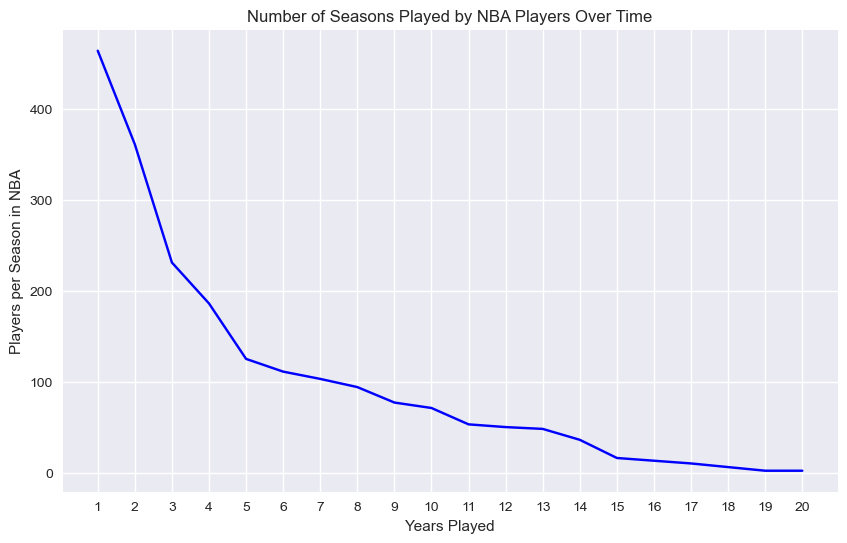

In [182]:
plt.figure(figsize=(10, 6))
plt.plot(Seasons_played, values , linestyle='-', color='b')
plt.title('Number of Seasons Played by NBA Players Over Time')
plt.xlabel('Years Played')
plt.ylabel('Players per Season in NBA')
plt.grid(True)
plt.show()

In [205]:
# Calculate the number of points on a team for each player
player_points = player_metadata.groupby(['Player Name','Team Abbreviation'])['Points'].count()
player_points


Player Name         Team Abbreviation
A.C. Green          MIA                   1
A.J. Guyton         CHI                   2
                    GSW                   1
AJ Hammons          DAL                   1
AJ Price            CLE                   1
                                         ..
Zoran Dragic        MIA                   1
Zoran Planinic      NJN                   3
Zydrunas Ilgauskas  CLE                  10
                    MIA                   1
Zylan Cheatham      NOP                   1
Name: Points, Length: 5223, dtype: int64

In [207]:
# Filter out players who have played for over 10 seasons
players_over_10_seasons = player_metadata_years[player_metadata_years > 10].index
players_over_10_seasons

Index(['Al Harrington', 'Al Horford', 'Al Jefferson', 'Al-Farouq Aminu',
       'Amar'e Stoudemire', 'Amir Johnson', 'Anderson Varejao',
       'Andre Iguodala', 'Andre Miller', 'Andrei Kirilenko',
       ...
       'Udonis Haslem', 'Vince Carter', 'Vladimir Radmanovic',
       'Wayne Ellington', 'Wesley Matthews', 'Willie Green', 'Wilson Chandler',
       'Zach Randolph', 'Zaza Pachulia', 'Zydrunas Ilgauskas'],
      dtype='object', name='Player Name', length=236)

In [209]:
# Filter the original DataFrame to include only players who have played for over 10 seasons
filtered_data = player_metadata[player_metadata['Player Name'].isin(players_over_10_seasons)]
filtered_data

,Player Name,Team Abbreviation,Age,Player Height,Player Weight,College,Country,Draft Year,Draft Round,Draft Number,...,Points,Rebounds,Assists,Net Rating,Offensive Rebound Percentage,Defensive Rebound Percentage,Usage Percentage,True Shooting Percentage,Assist Percentage,Season
215,Al Harrington,IND,21.0,205.74,115.212368,NaN,USA,1998,1,25,...,7.5,4.9,1.7,0.5,0.074,0.151,0.187,0.479,0.116,2000-01
851,Al Harrington,IND,22.0,205.74,113.398000,NaN,USA,1998,1,25,...,13.1,6.3,1.2,-1.3,0.084,0.151,0.218,0.526,0.073,2001-02
1166,Al Harrington,IND,23.0,205.74,113.398000,NaN,USA,1998,1,25,...,12.2,6.2,1.5,2.8,0.075,0.162,0.218,0.493,0.089,2002-03
1401,Al Harrington,IND,24.0,205.74,113.398000,NaN,USA,1998,1,25,...,13.3,6.4,1.7,1.8,0.078,0.175,0.231,0.514,0.107,2003-04
2057,Al Harrington,ATL,25.0,205.74,113.398000,NaN,USA,1998,1,25,...,17.5,7.0,3.2,-11.0,0.064,0.155,0.239,0.508,0.148,2004-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,Zydrunas Ilgauskas,CLE,32.0,220.98,117.933920,NaN,Lithuania,1996,1,20,...,11.9,7.7,1.6,4.6,0.128,0.204,0.218,0.527,0.099,2006-07
3201,Zydrunas Ilgauskas,CLE,33.0,220.98,117.933920,NaN,Lithuania,1996,1,20,...,14.1,9.3,1.4,0.7,0.132,0.217,0.229,0.522,0.082,2007-08
3818,Zydrunas Ilgauskas,CLE,34.0,220.98,117.933920,NaN,Lithuania,1996,1,20,...,12.9,7.5,1.0,14.8,0.109,0.212,0.237,0.523,0.060,2008-09
4455,Zydrunas Ilgauskas,CLE,35.0,220.98,117.933920,NaN,Lithuania,1996,1,20,...,7.4,5.4,0.8,7.9,0.107,0.197,0.189,0.491,0.058,2009-10


In [213]:
# Group by player name and calculate the total points scored by each player
player_points_total_over_10_seasons = filtered_data.groupby('Player Name')['Points'].sum()
player_points_total_over_10_seasons

Player Name
Al Harrington         186.5
Al Horford            196.5
Al Jefferson          212.9
Al-Farouq Aminu        78.0
Amar'e Stoudemire     245.1
                      ...  
Willie Green           96.0
Wilson Chandler       139.8
Zach Randolph         275.5
Zaza Pachulia         107.2
Zydrunas Ilgauskas    139.1
Name: Points, Length: 236, dtype: float64

In [223]:
player_points_total_over_10_seasons.min()

20.3

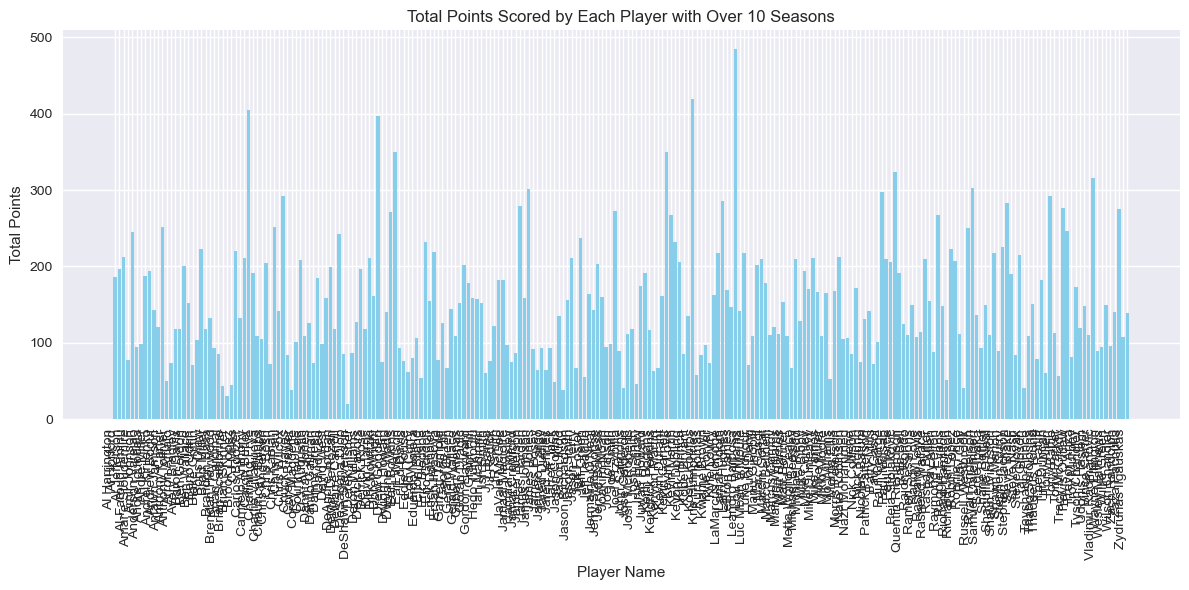

In [215]:
plt.figure(figsize=(12, 6))
plt.bar(player_points_total_over_10_seasons.index, player_points_total_over_10_seasons.values, color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Total Points')
plt.title('Total Points Scored by Each Player with Over 10 Seasons')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [217]:
# Filter out players who have played for o10 less than 10 seasons
players_less_10_seasons = player_metadata_years[player_metadata_years < 10].index
players_less_10_seasons

Index(['A.C. Green', 'A.J. Guyton', 'AJ Hammons', 'AJ Price', 'Aaron Gordon',
       'Aaron Gray', 'Aaron Harrison', 'Aaron Holiday', 'Aaron Jackson',
       'Aaron McKie',
       ...
       'Zarko Cabarkapa', 'Zeke Nnaji', 'Zeljko Rebraca', 'Zendon Hamilton',
       'Zhaire Smith', 'Zhou Qi', 'Zion Williamson', 'Zoran Dragic',
       'Zoran Planinic', 'Zylan Cheatham'],
      dtype='object', name='Player Name', length=1748)

In [218]:
# Filter the original DataFrame to include only players who have played for less than 10 seasons
filtered_data_2 = player_metadata[player_metadata['Player Name'].isin(players_less_10_seasons)]
filtered_data_2

,Player Name,Team Abbreviation,Age,Player Height,Player Weight,College,Country,Draft Year,Draft Round,Draft Number,...,Points,Rebounds,Assists,Net Rating,Offensive Rebound Percentage,Defensive Rebound Percentage,Usage Percentage,True Shooting Percentage,Assist Percentage,Season
214,A.C. Green,MIA,37.0,205.74,102.05820,Oregon State,USA,1985,1,23,...,4.5,3.8,0.5,3.3,0.089,0.171,0.141,0.492,0.050,2000-01
213,A.J. Guyton,CHI,23.0,185.42,81.64656,Indiana,USA,2000,2,32,...,6.0,1.1,1.9,-12.4,0.018,0.053,0.169,0.495,0.198,2000-01
856,A.J. Guyton,CHI,24.0,185.42,81.64656,Indiana,USA,2000,2,32,...,5.4,1.0,1.8,-3.8,0.022,0.067,0.221,0.477,0.248,2001-02
1172,A.J. Guyton,GSW,25.0,185.42,81.64656,Indiana,USA,2000,2,32,...,0.0,0.0,1.0,-3.9,0.000,0.000,0.282,0.000,0.400,2002-03
7648,AJ Hammons,DAL,24.0,213.36,117.93392,Purdue,USA,2016,2,46,...,2.2,1.6,0.2,-0.6,0.049,0.199,0.167,0.472,0.038,2016-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,Zoran Dragic,MIA,26.0,195.58,90.71840,NaN,Slovenia,Undrafted,Undrafted,Undrafted,...,1.8,0.5,0.3,-15.3,0.072,0.045,0.217,0.435,0.116,2014-15
1609,Zoran Planinic,NJN,21.0,200.66,88.45044,NaN,Croatia,2003,1,22,...,3.1,1.1,1.4,-9.4,0.036,0.109,0.197,0.492,0.274,2003-04
1909,Zoran Planinic,NJN,22.0,200.66,90.71840,NaN,Croatia,2003,1,22,...,5.0,1.6,1.0,-4.8,0.044,0.118,0.227,0.534,0.185,2004-05
2327,Zoran Planinic,NJN,23.0,200.66,90.71840,NaN,Croatia,2003,1,22,...,3.4,1.3,0.9,-4.5,0.028,0.128,0.209,0.450,0.179,2005-06


In [219]:
# Group by player name and calculate the total points scored by each player
player_points_total_less_10_seasons = filtered_data_2.groupby('Player Name')['Points'].sum()
player_points_total_less_10_seasons

Player Name
A.C. Green          4.5
A.J. Guyton        11.4
AJ Hammons          2.2
AJ Price           32.1
Aaron Gordon       87.5
                   ... 
Zhou Qi             3.2
Zion Williamson    49.5
Zoran Dragic        1.8
Zoran Planinic     11.5
Zylan Cheatham      3.0
Name: Points, Length: 1748, dtype: float64

In [222]:
player_points_total_less_10_seasons.max()

224.3

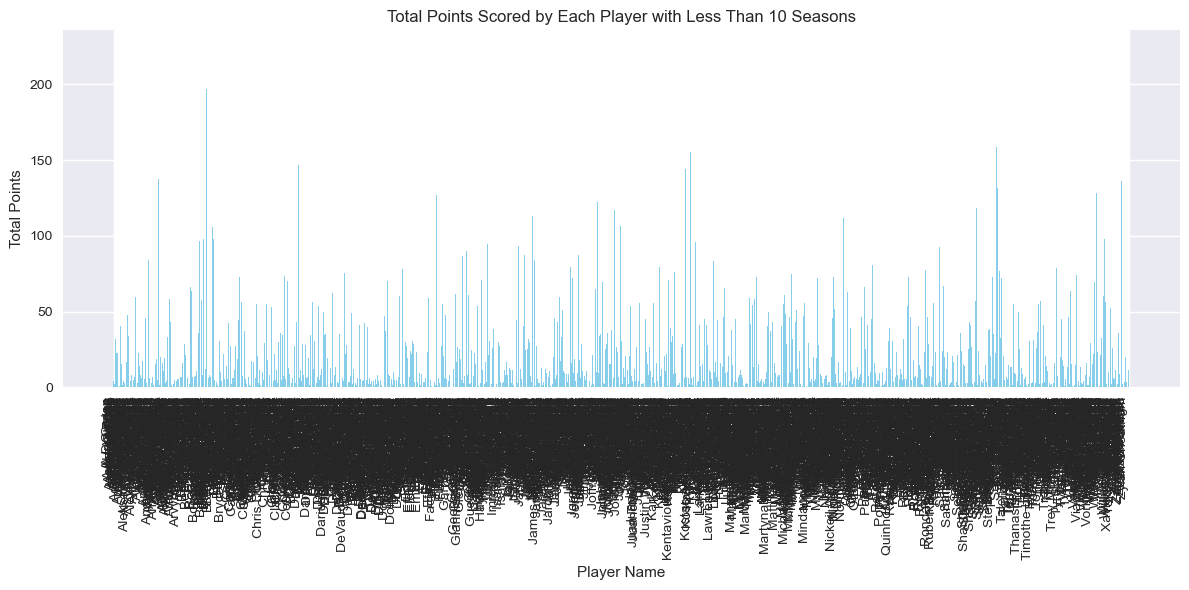

In [221]:
plt.figure(figsize=(12, 6))
plt.bar(player_points_total_less_10_seasons.index, player_points_total_less_10_seasons.values, color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Total Points')
plt.title('Total Points Scored by Each Player with Less Than 10 Seasons')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()